<a href="https://colab.research.google.com/github/cmyhre2/MLA5_CTM/blob/main/MLA5_CTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #5  
**Chris Myhre**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#example - you will replace this with the models you are actually using.
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1


### Acquire Data

In [8]:
landsat_train=pd.read_csv('/content/drive/MyDrive/CS430/Assignment_5/landsat_train.csv')
landsat_test=pd.read_csv('/content/drive/MyDrive/CS430/Assignment_5/landsat_test.csv')

### Statistical and Visual Exploration

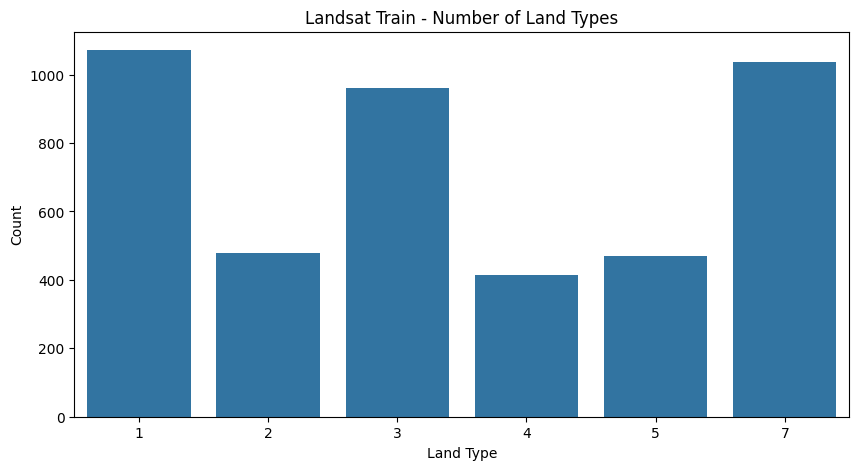

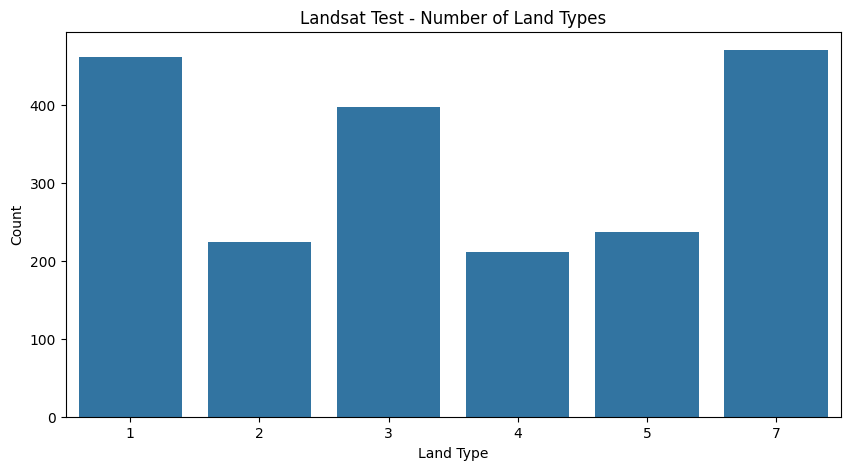

In [19]:
# Assuming 'land_type' column exists in both dataframes
plt.figure(figsize=(10, 5))
sns.countplot(x='land_type', data=landsat_train)
plt.title('Landsat Train - Number of Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='land_type', data=landsat_test)
plt.title('Landsat Test - Number of Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [10]:
X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']


### Building the Pipeline

In [31]:
# Create a column transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Assuming all features except 'land_type' are numerical
# You might need to adjust the 'numerical_cols' list if you have categorical features
numerical_cols = X_train.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

# Create the pipeline with the preprocessor and RandomForestClassifier
rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [33]:
# Fit the pipeline to the training data
rfc_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc_pipeline.predict(X_test)

# Evaluate the model (example: using accuracy)
# You can replace this with other evaluation metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9927272727272727


### Evaluating Model

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.97      0.98      0.98       224
           3       0.89      0.95      0.92       397
           4       0.78      0.64      0.70       211
           5       0.93      0.89      0.91       237
           7       0.87      0.90      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



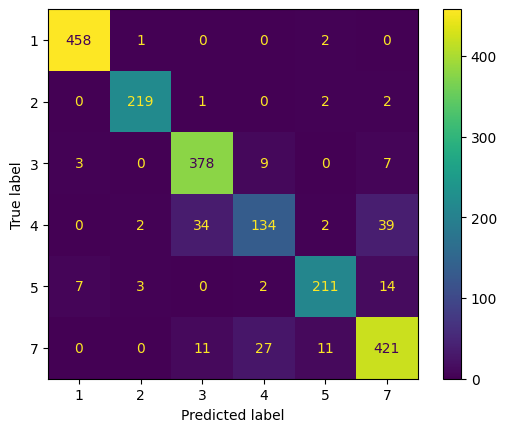

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Use the classification_report function to display precision, recall, and F1 score
print(classification_report(y_test, y_pred))

# Use the ConfusionMatrixDisplay function to display a heatmap of the confusion matrix
ConfusionMatrixDisplay.from_estimator(rfc_pipeline, X_test, y_test)
plt.show()

### Conclusion
  The RandomForestClassifier model shows a decent level of accuracy in predicting land type based on the provided Landsat data. Additional analysis of the classification report, confusion matrix, and other relevant metrics (precision, recall, F1 score) would provide a more in-depth understanding of the model's performance for each tpe of land. Areas where the model struggles (Shown via lower precision scores or recall for certain land types in the confusion matrix) should be investigated to identify potential improvements. Additional exploration with alternative models or featuire engineering techniques to improve predictive accuracy, mainly for those lower-performing land types. More data and/or more diverse data may also improve performance.

## Problem 2

In [16]:
# Create the pipeline with the preprocessor and VotingClassifier
vc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(estimators=[
        ('random_forest', RandomForestClassifier()),
        ('bagging', BaggingClassifier()),
        ('adaboost', AdaBoostClassifier())
    ]))
])

In [17]:
# Fit the pipeline to the training data
vc_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = vc_pipeline.predict(X_test)

# Evaluate the model (example: using accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.899


### Conclusion
  Putting the data through a Voting Classifier has a negative impact on the model's accuracy, decreasing it from 0.993 to 0.899. Still decent accuracy but 10% worse.

## Problem 3


### Acquire Data

In [18]:
banknote_data = pd.read_csv('/content/drive/MyDrive/CS430/Assignment_5/banknote_authentication.csv')

### Statistical and Visual Exploration

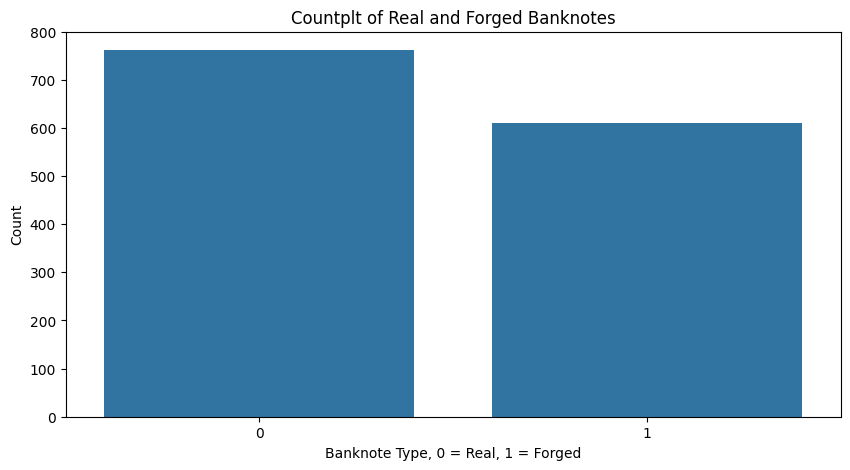

In [26]:
# Assuming 'land_type' column exists in both dataframes
plt.figure(figsize=(10, 5))
sns.countplot(x='forgery', data=banknote_data)
plt.title('Countplt of Real and Forged Banknotes')
plt.xlabel('Banknote Type, 0 = Real, 1 = Forged')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [27]:
# split the data into training and test sets
X = banknote_data.drop('forgery', axis=1)
y = banknote_data['forgery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [32]:
# Create a column transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Assuming all features except 'land_type' are numerical
# You might need to adjust the 'numerical_cols' list if you have categorical features
numerical_cols = X_train.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

# Create the pipeline with the preprocessor and RandomForestClassifier
rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [34]:
# Create a column transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Assuming all features except 'land_type' are numerical
# You might need to adjust the 'numerical_cols' list if you have categorical features
numerical_cols = X_train.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

# Create the pipeline with the preprocessor and RandomForestClassifier
rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [39]:
# prompt: Run the pipeline to fit the RandomForestClassification model.

# Assuming necessary libraries are already imported and data is loaded as in the provided code.
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# ... (previous code) ...

# ### Executing the Model
# Fit the pipeline to the training data
rfc_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc_pipeline.predict(X_test)

# Evaluate the model (example: using accuracy)
# You can replace this with other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# ... (rest of the code) ...

Accuracy: 0.9927272727272727


### Evaluating Model

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



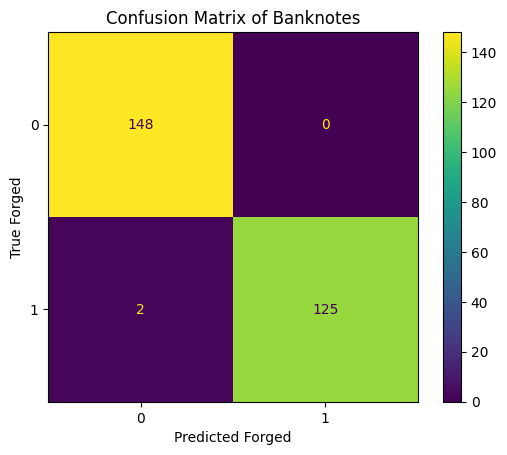

In [49]:
# Use the classification_report function to display precision, recall, and F1 score
print(classification_report(y_test, y_pred))

# Use the ConfusionMatrixDisplay function to display a heatmap of the confusion matrix
ConfusionMatrixDisplay.from_estimator(rfc_pipeline, X_test, y_test)
plt.title('Confusion Matrix of Banknotes')
plt.xlabel('Predicted Forged')
plt.ylabel('True Forged')
plt.show()

### Conclusion
  The RandomForestClassifier model shows a near pefect level of accuracy in predicting if the banknotes are forged or not. The confusion matrix shows only two banknotes were falsely predicted forged while none of the forged notes were falsely predicted real. The data also shows a little bias towards forged notes given that there are about 25 more of them than real notes. So additional training may be needed to balance them out. CHanging the weights of the forged and real banknotes should be enough.